In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
N, D, H = 64, 1000, 100
x       = tf.placeholder(tf.float32, shape=(N, D))

y       = tf.placeholder(tf.float32, shape=(N, D))

w1      = tf.Variable(tf.random_normal((D,H)),name="w1")

w2      = tf.Variable(tf.random_normal((H,D)),name="w2")

h       = tf.maximum(tf.matmul(x, w1), 0)

y_pred  = tf.matmul(h, w2)

diff    = y_pred - y  

loss    = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grade_w1,grade_w2 = tf.gradients(loss,[w1,w2])

In [9]:

#Using Optimizer ADAGRID
grad_squared_w1   = tf.zeros(shape=[D,H],name="grad_squared_w1")

grad_squared_w2   = tf.zeros(shape=[H,D],name="grad_squared_w2")

learning_rate     = 1e-3

grad_squared_w1  += (grade_w1 * grade_w1)

new_w1            = w1.assign(w1 - learning_rate * grade_w1/(tf.sqrt(grad_squared_w1) + 1e-7))
 
grad_squared_w2  += (grade_w2 * grade_w2)

new_w2            = w2.assign(w2 - learning_rate * grade_w2/(tf.sqrt(grad_squared_w2) + 1e-7))

Update            = tf.group(new_w1,new_w2)

Q                 = tf.group(grad_squared_w1 , grad_squared_w2)

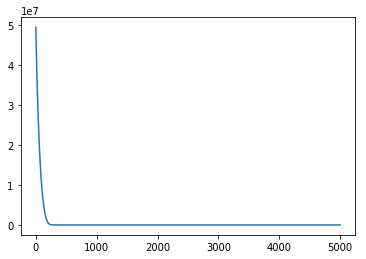

[49412548.0, None] [714.2765, None]


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    
    loss_summery=[]
    steps =5000
    for t in range(steps):
        out      = sess.run([loss,Update],feed_dict=values)
        loss_val = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery)
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])

    
